##Import Modules

In [1]:
# Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import google drive package
from google.colab import drive

# Import FastAI computer vision module
from fastai.vision import *

##Connect to Google Drive

In [2]:
# Connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Save path to project folder 
root_path = 'gdrive/My Drive/Proyek/'

In [4]:
# Create Consoles folder 
#(Path(root_path)/'Consoles').mkdir(parents=True, exist_ok=True)

In [5]:
# Save path for consoles folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/Proyek/Consoles/'

##Create directory and upload picture file into directory

In [6]:
# Create folder names 
folders = ['Sony_PlayStation','Sony_PlayStation_2','Sony_PlayStation_3','Sony_PlayStation_4','Sony_PlayStation_5',
           'Xbox','Xbox_360','Xbox_One','Xbox_Series_X','Xbox_Series_S',
           'Nintendo_64','Nintendo_GameCube','Nintendo_Wii','Nintendo_Wii_U','Nintendo_Switch']

In [7]:
# Create all folders in /Consoles
#for i in folders:
  #path = Path(proj_path)
  #dest = (path/i).mkdir(parents = True, exist_ok = True)

In [8]:
# Save fastai path
p_path = Path(proj_path)

##View Image Data

In [9]:
# Create image data bunch with 80/20 train valid split
np.random.seed(30)
data = ImageDataBunch.from_folder(p_path, train = ".", valid_pct = 0.2, 
                                  ds_tfms = get_transforms(), size = 224, 
                                  num_workers = 4).normalize(imagenet_stats)

In [10]:
# Return data classes
print(data.classes)

['Nintendo_64', 'Nintendo_GameCube', 'Nintendo_Switch', 'Nintendo_Wii', 'Nintendo_Wii_U', 'Sony_PlayStation', 'Sony_PlayStation_2', 'Sony_PlayStation_3', 'Sony_PlayStation_4', 'Sony_PlayStation_5', 'Xbox', 'Xbox_360', 'Xbox_One', 'Xbox_Series_S', 'Xbox_Series_X']


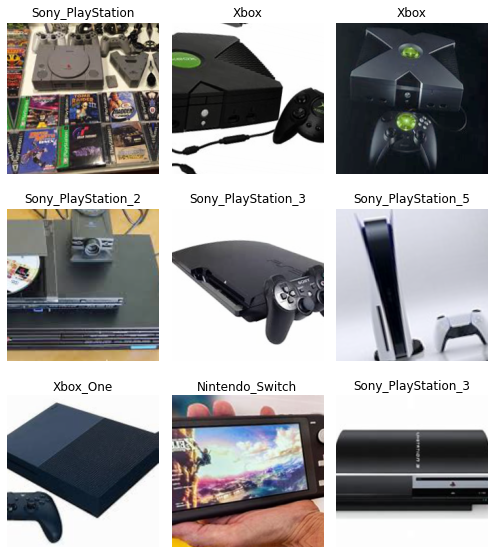

In [11]:
# Return sample of labeled images 
data.show_batch(rows=3,figsize=(7,8))

In [12]:
# Return data classes
print(data.classes) 

# Return the number of classes
print("Number of classes: {}".format(data.c))

# Return total images to use as the training set
print("Total images to use as the training set: {}".format(len(data.train_ds)))

# Return total images to use as the validation set
print("Total images to use as the validation set: {}".format(len(data.valid_ds)))

['Nintendo_64', 'Nintendo_GameCube', 'Nintendo_Switch', 'Nintendo_Wii', 'Nintendo_Wii_U', 'Sony_PlayStation', 'Sony_PlayStation_2', 'Sony_PlayStation_3', 'Sony_PlayStation_4', 'Sony_PlayStation_5', 'Xbox', 'Xbox_360', 'Xbox_One', 'Xbox_Series_S', 'Xbox_Series_X']
Number of classes: 15
Total images to use as the training set: 2400
Total images to use as the validation set: 600


##Train Model

In [13]:
# Create Convolutional Neural Net learner object
# Use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
# Train 8 epochs of the model 
learn.fit_one_cycle(8)

We can see the decrease in error_rate after several cycles of the resnet34 architecture. We see roughly 25% train loss, 21% valid loss, and 6% error rate giving us 94% accuracy in classifying video game console. But this is not good enough!

In [15]:
# Save model into folder models
learn.save('modelCNN1_34', return_path=True)

PosixPath('gdrive/My Drive/Proyek/Consoles/models/modelCNN1_34.pth')

In [16]:
# Unfreeze model
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


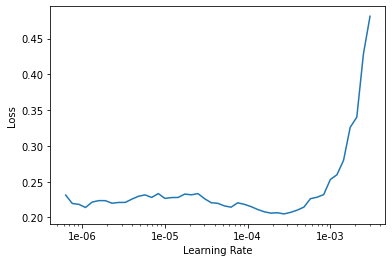

In [17]:
# Find optimal learning rates 
learn.lr_find() # If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)

# Show optimal learning rates graph
learn.recorder.plot()

In [18]:
# Fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001) # WD = waited decay = normalization

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


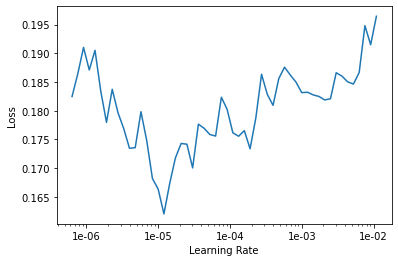

In [19]:
# Freeze model
learn.freeze()

# Find optimal learning rates 
learn.lr_find()

# Show optimal learning rates graph
learn.recorder.plot()

In [20]:
# Save model into folder models
learn.save('modelCNN2_34')

After conducting a new learning rates, we lower the error rate from roughly 6% to 5% error rate, giving us roughly 95% accuracy of classifying video game console.

##Validation

In [23]:
# Load modelCNN2_34 from folder models
learn.load('modelCNN2_34')
interp = ClassificationInterpretation.from_learner(learn)

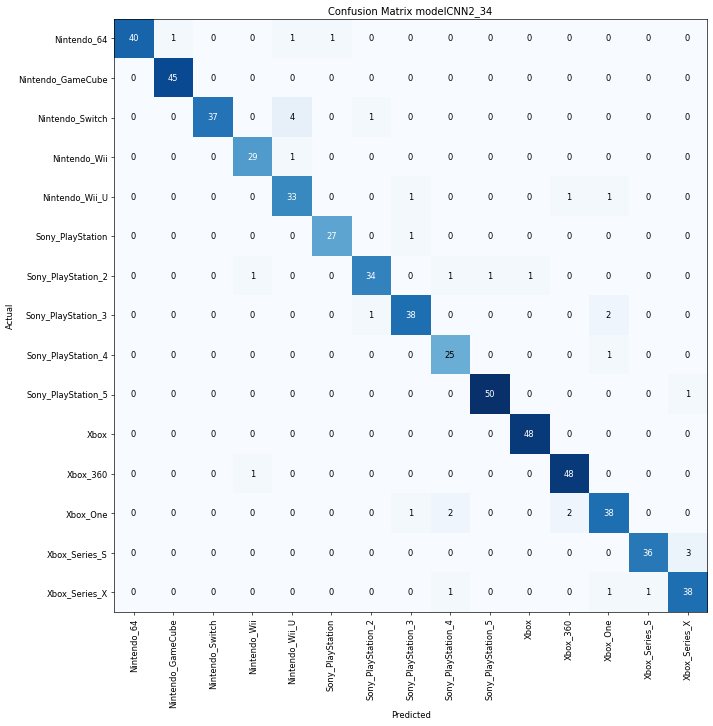

In [24]:
# Plot results of model on validation set 
interp.plot_confusion_matrix(title = "Confusion Matrix modelCNN2_34", figsize=(12,12), dpi=60)

In [25]:
# Display descending order all values other than diagonal.
interp.most_confused(min_val=2) # Actual, Predicted, count mistake

[('Nintendo_Switch', 'Nintendo_Wii_U', 4),
 ('Xbox_Series_S', 'Xbox_Series_X', 3),
 ('Sony_PlayStation_3', 'Xbox_One', 2),
 ('Xbox_One', 'Sony_PlayStation_4', 2),
 ('Xbox_One', 'Xbox_360', 2)]

We can see from the result above that the modelCNN2_34 made 4 mistakes in classifying a Nintendo Switch with a Nintendo Wii U.

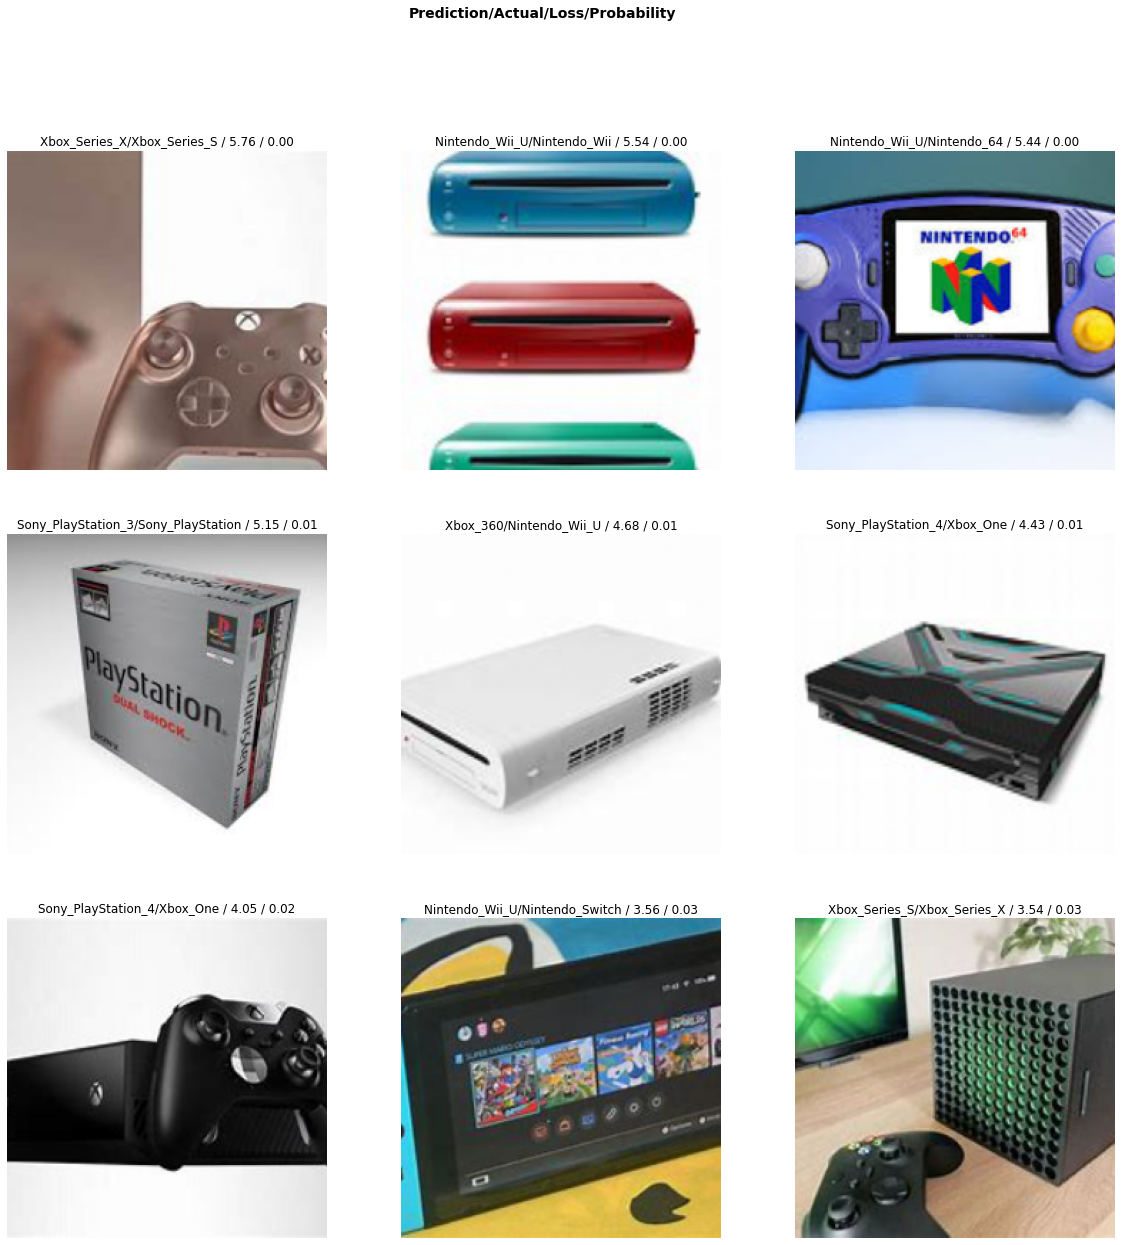

In [26]:
# Plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(20,20))

##Putting an Image in Production and See the Prediction

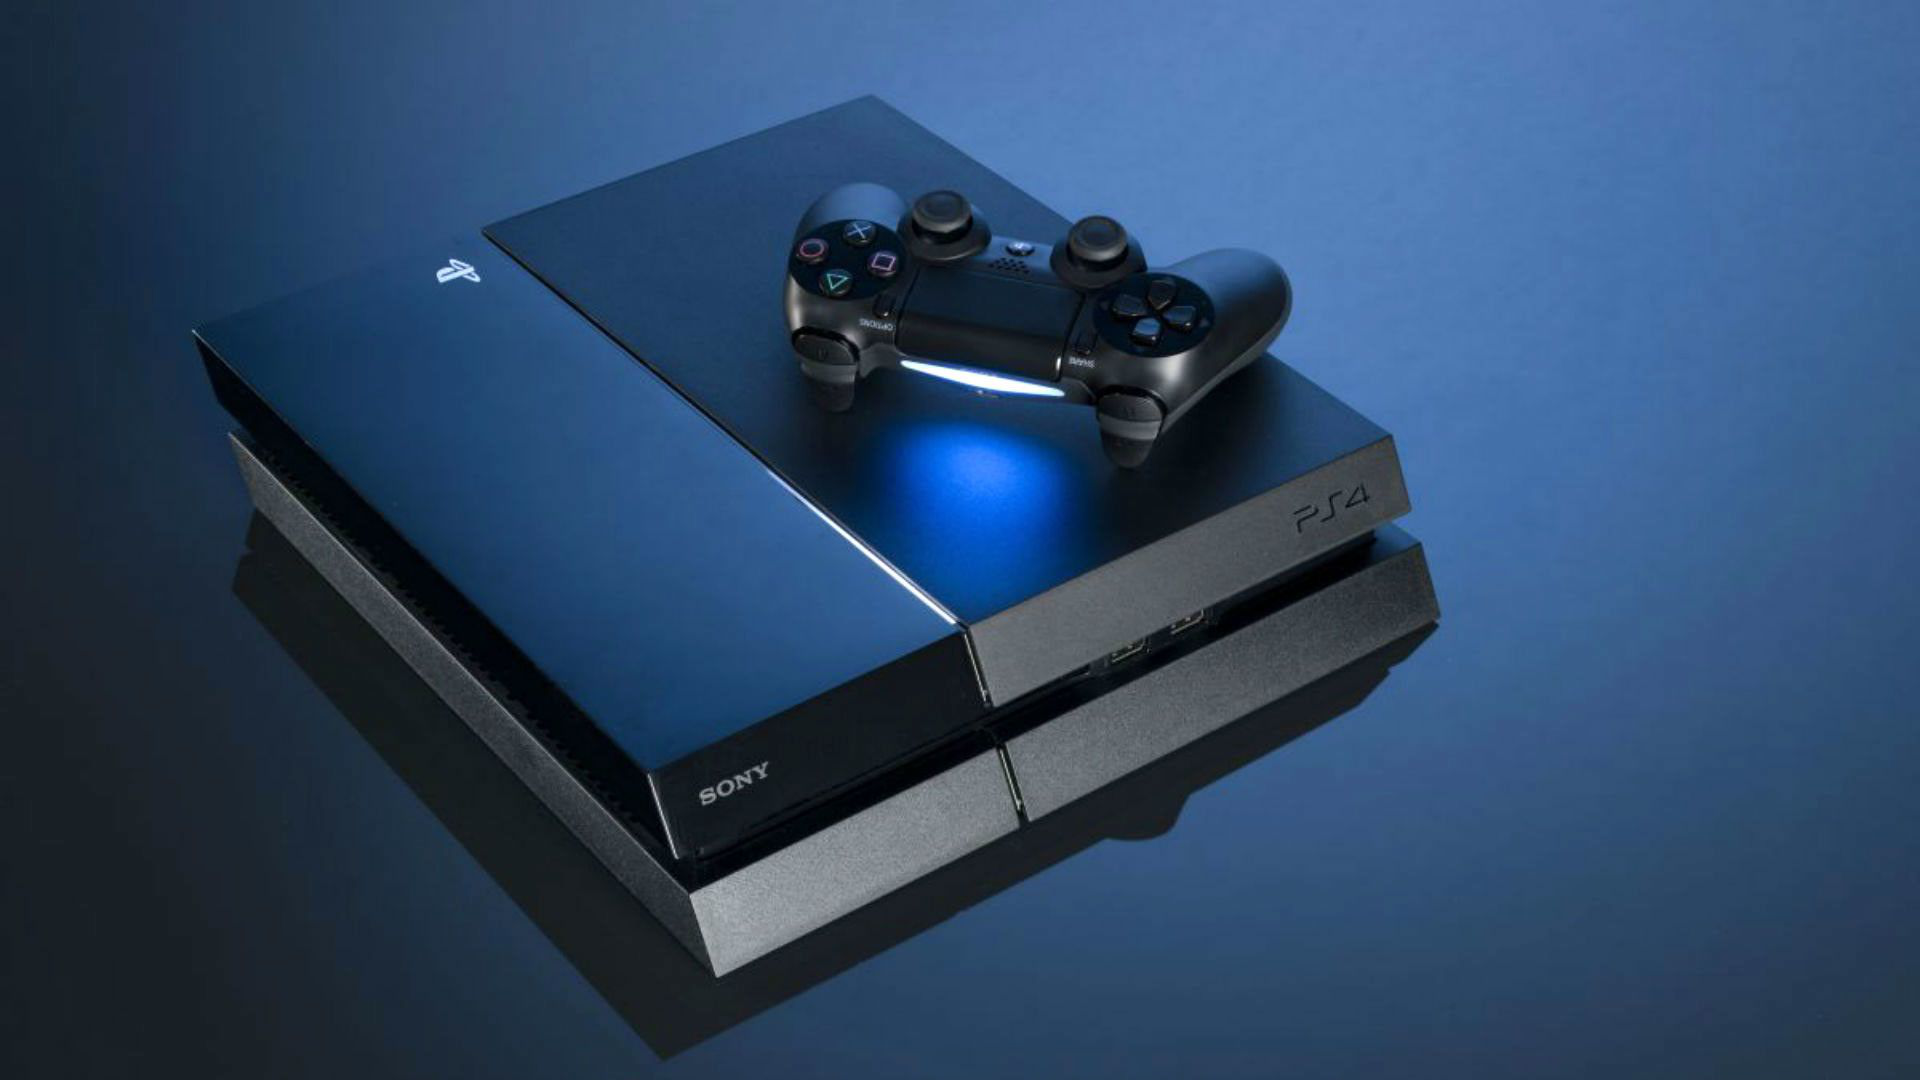

In [27]:
img_ps4 = open_image(Path(root_path)/'Consoles_valid'/'ps4_valid.jpg')
img_ps4 

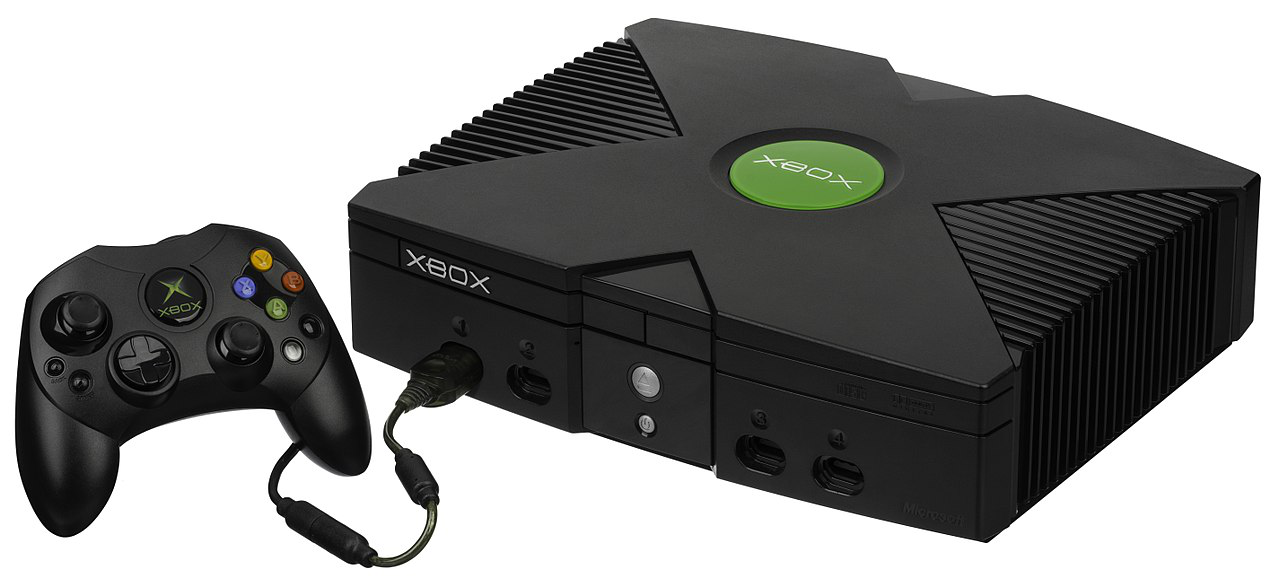

In [28]:
img_xbox_1st = open_image(Path(root_path)/'Consoles_valid'/'xbox_first_valid.jpg')
img_xbox_1st

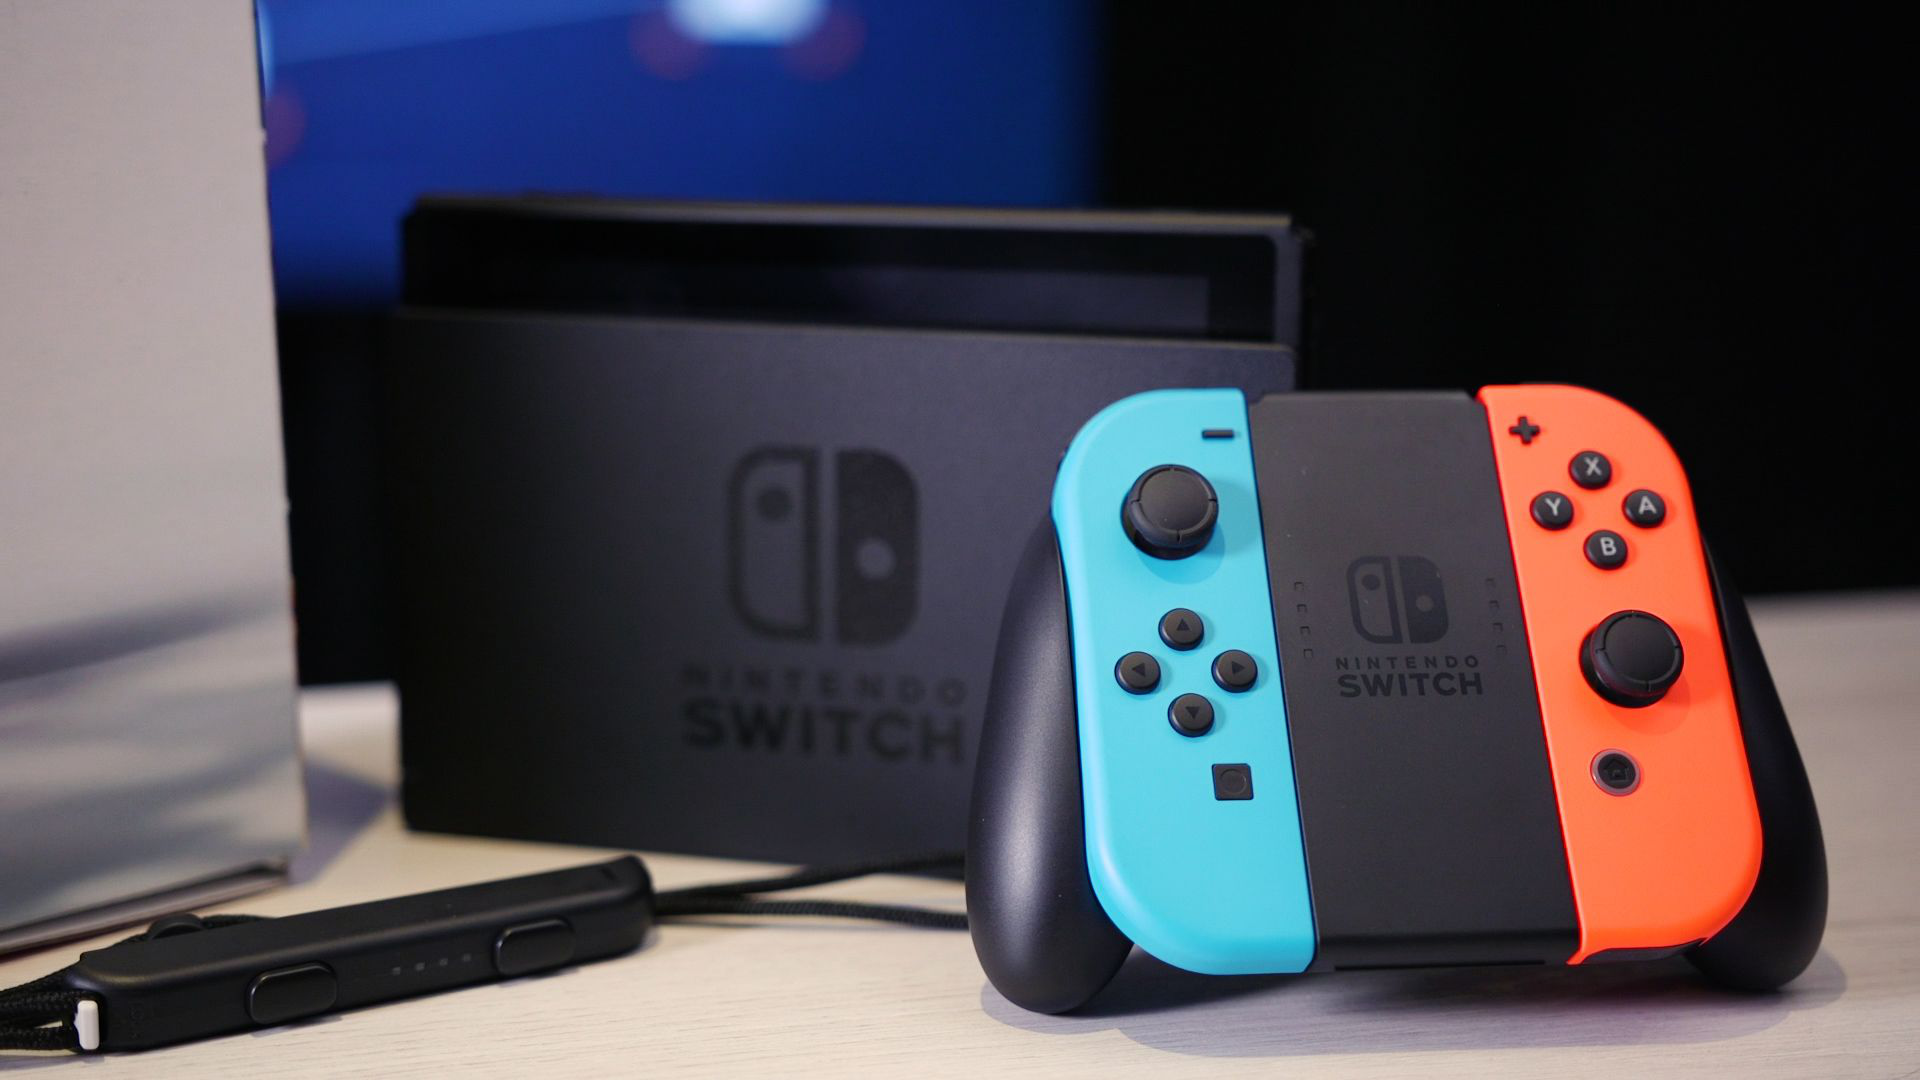

In [29]:
img_switch = open_image(Path(root_path)/'Consoles_valid'/'nswitch_valid.jpg')
img_switch

###Prediction

In [30]:
pred_class_ps4,pred_idx,outputs = learn.predict(img_ps4)
print("img_ps4 is categorized in the category: {}".format(pred_class_ps4))

img_ps4 is categorized in the category: Sony_PlayStation_4


In [31]:
pred_class_xbox_1st,pred_idx,outputs = learn.predict(img_xbox_1st)
print("img_xbox_1st is categorized in the category: {}".format(pred_class_xbox_1st))

img_xbox_1st is categorized in the category: Xbox


In [32]:
pred_class_switch,pred_idx,outputs = learn.predict(img_switch)
print("img_switch is categorized in the category: {}".format(pred_class_switch))

img_switch is categorized in the category: Nintendo_Switch


modelCNN2_34 has a 95% accuracy to classifying video game console. Perfect!